In [1]:
import numpy as np
import sklearn.linear_model
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

X=np.linspace(0,3,31)
#X=np.linspace(0,1,10)
print(X)
TF=X

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3. ]


In [2]:
Abeta = [-1,2,1]
TF=np.polyval(Abeta,X)
print(TF)

[ 1.    1.19  1.36  1.51  1.64  1.75  1.84  1.91  1.96  1.99  2.    1.99
  1.96  1.91  1.84  1.75  1.64  1.51  1.36  1.19  1.    0.79  0.56  0.31
  0.04 -0.25 -0.56 -0.89 -1.24 -1.61 -2.  ]


In [3]:
Xtr=np.mat(X[:10]).T
ytr=TF[:10]
print(ytr)

[ 1.    1.19  1.36  1.51  1.64  1.75  1.84  1.91  1.96  1.99]


In [4]:
regr = sklearn.linear_model.LinearRegression()
regr.fit(Xtr,ytr)
beta=np.zeros(2)
beta[0]=regr.intercept_
beta[1]=regr.coef_
print(beta)

[ 1.12  1.1 ]


In [5]:
Esti_Value=np.polyval(beta[::-1],X)
print(Esti_Value)

[ 1.12  1.23  1.34  1.45  1.56  1.67  1.78  1.89  2.    2.11  2.22  2.33
  2.44  2.55  2.66  2.77  2.88  2.99  3.1   3.21  3.32  3.43  3.54  3.65
  3.76  3.87  3.98  4.09  4.2   4.31  4.42]


In [6]:
EV=regr.predict(np.mat(X).T)
print(EV)

[ 1.12  1.23  1.34  1.45  1.56  1.67  1.78  1.89  2.    2.11  2.22  2.33
  2.44  2.55  2.66  2.77  2.88  2.99  3.1   3.21  3.32  3.43  3.54  3.65
  3.76  3.87  3.98  4.09  4.2   4.31  4.42]


EV and Esti_Value are the same. Esti_Value is how sklearn.linear.predict() works.

## (c) Here is the plot of estimate function and true function for x in [0,3]

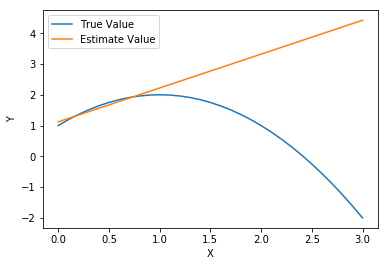

In [7]:
plt.plot(X,TF)
plt.plot(X,EV)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['True Value', 'Estimate Value'],loc='upper left')

In [8]:
Bias=np.zeros(31)
for i in range(31):
    Bias[i]=(EV[i]-TF[i])**2
print(np.max(Bias))
print(X[np.argmax(Bias)])

41.2164
3.0


## (d) So, because of the function monotonicity, when x=3, it has the largest bias 41.2164.